In [1]:
%reset -f

# 0. Import dependencies and load data

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))


In [3]:
from src.model_utility_functions import (
    preprocess_data,
    plot_acf_pacf,
    evaluate_ar_model,
    split_data,
    compare_lag_sets,
    plot_predictions,
    extract_features
)

In [4]:
DATA_FOLDER_PATH = os.path.join(os.path.dirname(os.getcwd()), "data")
BASE_FILE_NAME = "_in_USD_historical_data.csv"

In [5]:
btc = pd.read_csv(os.path.join(DATA_FOLDER_PATH, f"BTC{BASE_FILE_NAME}"))
btc = preprocess_data(btc)
eth = pd.read_csv(os.path.join(DATA_FOLDER_PATH, f"ETH{BASE_FILE_NAME}"))
eth = preprocess_data(eth)
ltc = pd.read_csv(os.path.join(DATA_FOLDER_PATH, f"LTC{BASE_FILE_NAME}"))
ltc = preprocess_data(ltc)

# 1.1. Find best lags

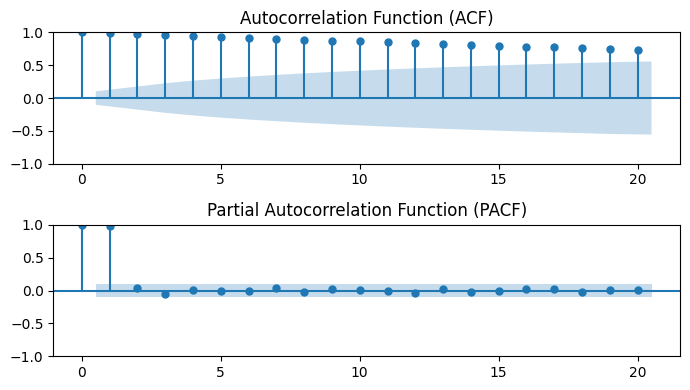

In [6]:
plot_acf_pacf(btc, lags=20)

based on the ACF and PACF results I choose the lags 1, 2, 7

In [7]:
lag_set = (1, 2, 7)

In [8]:
train, test = split_data(btc, train_ratio=0.8)

In [9]:
mse, predictions = evaluate_ar_model(train, test, lag_set)

In [10]:
compare_lag_sets(btc, lag_set)

Lags: 1, Test MSE: 54894799.2430
Lags: 2, Test MSE: 59404086.3996
Lags: 7, Test MSE: 54021944.8167


{1: np.float64(54894799.24301511),
 2: np.float64(59404086.39963948),
 7: np.float64(54021944.81672851)}

In [19]:
test.index

DatetimeIndex(['2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03',
               '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15',
               '2024-08-16', '2024-08-17', '2024-08-18', '2024-08-19',
               '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23',
               '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31',
               '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08',
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
      

In [20]:
predictions

2024-07-27    67624.205436
2024-07-28    67647.142272
2024-07-29    67630.689682
2024-07-30    67632.252375
2024-07-31    67635.725192
                  ...     
2024-10-04    67054.394010
2024-10-05    67048.261811
2024-10-06    67042.198696
2024-10-07    67036.203887
2024-10-08    67030.276614
Freq: D, Length: 74, dtype: float64

In [ ]:
plt.plot(test.index, predictions, label=f'Predicted (Lags: {lags})')

ValueError: x and y must have same first dimension, but have shapes (74,) and (1,)

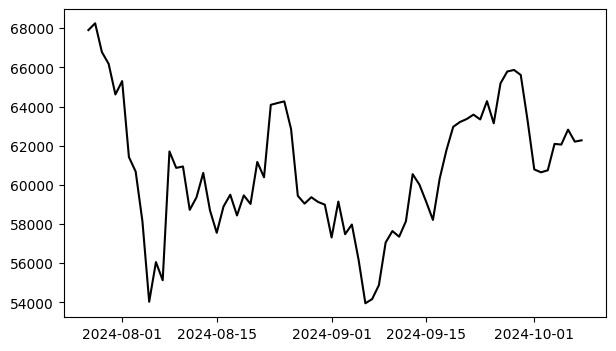

In [15]:
plot_predictions(test, predictions)